In [1]:
!conda env list
!python -V
import sys
print(sys.executable)

# conda environments:
#
base                  *  /Applications/anaconda3
phd                      /Applications/anaconda3/envs/phd

Python 3.9.7
/Applications/anaconda3/bin/python


# Table of Contents
* [Model Function](#ch1)
* [Inference code](#ch2)

In [59]:
# DATA ANALYSIS
import numpy as np
import pandas as pd
#from sklearn
from scipy.stats import bernoulli

# PLOTS
import matplotlib.pyplot as plt
#import seaborn as sns
import plotly.express as px

# OTHERS
#import math
#import pickle

# import color blind colors
colorblind = ['#377eb8', '#ff7f00', '#4daf4a',
              '#f781bf', '#a65628', '#984ea3',
              '#999999', '#e41a1c', '#dede00']

# Model Function <a class="anchor" id="ch1"></a>
The model outputs three variables
- `murderer`: Grey or Auburn
- `weapon`: revolver or dagger
- `hair`: true or false

The probability of success for the Benoulli trial for the variables `weapon` and `hair` are conditionnaly dependent on the outcome of `murderer`

Definitions:
- random variate: particular outcome of a random variable

Functions:
- `bernoulli.rvs(p)`: generates a random variates for a randome variable following a Bernoulli distribution of probability p

In [3]:
def murderMysteryModel():
    murderer = getMurderer()
    return {
        "murderer" : murderer,
        "weapon" : getWeapon(murderer),
        "hair" : getHair(murderer)
    }

def getMurderer():
    p_auburn = 0.7
    
    # use dictionnnary mapping
    murderer = {
        0: "Grey",
        1: "Auburn",
    }
    return murderer.get(bernoulli.rvs(p_auburn))

def getWeapon(murderer):
    if (murderer=="Auburn"): p_revolver = 0.2
    elif (murderer=="Grey"): p_revolver = 0.9
            
    weapon = {
        0: "dagger",
        1: "revolver",
    }
    return weapon.get(bernoulli.rvs(p_revolver))

def getHair(murderer):
    if (murderer=="Auburn"): p_hair = 0.05
    elif (murderer=="Grey"): p_hair = 0.5
    
    return bool(bernoulli.rvs(p_hair))

In [4]:
# random variates for the murder mystery model
murderMysteryModel()

{'murderer': 'Auburn', 'weapon': 'revolver', 'hair': False}

# Inference code <a class="anchor" id="ch2"></a>

In [13]:
def inferenceCode(obs, label, n_samples = 10000):
    '''
    obs: inference query dict
    inference query: 
    '''
    samples = []
    n_iter = 0
    
    # create joint samples
    while(len(samples) < n_samples):
        sample = murderMysteryModel()
        n_match = 0
        n_iter += 1
        # check how many keys in common
        for key in obs.keys():
            if (sample[key] == obs[key]): 
                n_match += 1
        # save sample if all key match
        if (n_match == len(obs)): samples.append(sample)
    print(n_iter,'iterations performed to get', n_samples, 'samples matching the following inference query:', obs)
    
    # extract murderers name
    m = []
    for elem in samples:
        m.append(elem["murderer"])
        
    # create data frame with output
    df = pd.Series(m, name = 'count').value_counts()
    df = df.reset_index().rename(columns={'index':'Name'})
    # normalise counts to [0,1]
    df["P(murderer)"] = df["count"].apply(lambda x: x/df["count"].sum())
    # add category 
    df['Label'] = label
    return df

In [14]:
# John - what's an inference query? is it EXACTLY the observations?
m = inferenceCode({}, 
                  'Prior')
mw = inferenceCode({'weapon': 'revolver'}, 
                   'After observing weapon')
mh = inferenceCode({'hair': True}, 
                   'After observing hair')
mwh = inferenceCode({'weapon': 'revolver', 'hair': True}, 
                   'After observing weapon and hair')
# concatenate
murderers = pd.concat([m, mw, mh, mwh])
murderers

10000 iterations performed to get 10000 samples matching the following inference query: {}
24112 iterations performed to get 10000 samples matching the following inference query: {'weapon': 'revolver'}
53640 iterations performed to get 10000 samples matching the following inference query: {'hair': True}
70542 iterations performed to get 10000 samples matching the following inference query: {'weapon': 'revolver', 'hair': True}


,Name,count,P(murderer),Label
0,Auburn,6903,0.6903,Prior
1,Grey,3097,0.3097,Prior
0,Grey,6591,0.6591,After observing weapon
1,Auburn,3409,0.3409,After observing weapon
0,Grey,8091,0.8091,After observing hair
1,Auburn,1909,0.1909,After observing hair
0,Grey,9476,0.9476,After observing weapon and hair
1,Auburn,524,0.0524,After observing weapon and hair


In [126]:
# plot figure
fig = px.bar(murderers,
             x="Label",
             y="P(murderer)",
             color="Name",
             #barmode="group",
             title="P(murderer) for various inference queries",
             width=700,
             height=400)
fig.update_layout(
    font_color="black",
    font_size=9,
    title_font_size=14
)
fig.show()

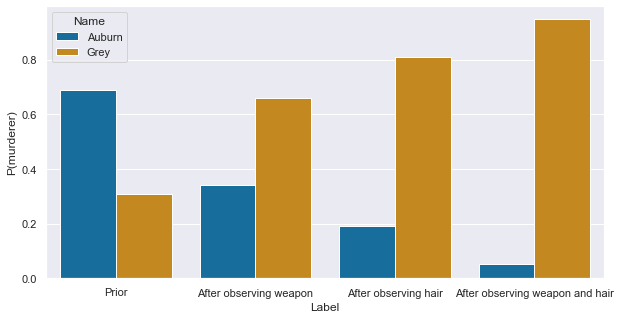

In [56]:
f = plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid",palette="colorblind")
sns.barplot(x="Label", 
            y="P(murderer)", 
            hue="Name", 
            data=murderers)
plt.show()